# Capstone Project VII
###### Ryan Pitt
This project will focus on generating an in depth Principal Component Analysis of the US Arrests dataset from Kaggle. 

## Introduction
This data set contains information about the arrests of various states in the USA. There are 5 columns, the state the arrest was made in, the number of Murder, Assault, Rape per 100,000 people and the percent of the population living in urban areas.

A data frame with 50 observations on 4 variables.

Murder numeric Murder arrests (per 100,000)
Assault numeric Assault arrests (per 100,000)
UrbanPop numeric Percent urban population
Rape numeric Rape arrests (per 100,000)

### Import Libraries and read dataset

In [182]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy import stats

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#Hierarchical Clustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

#K means clustering
from sklearn.cluster import KMeans

data_df = pd.read_csv('./UsArrests.csv', index_col = 'City')
data_df.index.names = ['State']
data_df.head()

,Murder,Assault,UrbanPop,Rape
State,,,,
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


## Preprocessing of data

In [183]:
print('Number of rows: {} Number of features: {}'.format(data_df.shape[0],data_df.shape[1]))

Number of rows: 50 Number of features: 4


In [184]:
# Count missing values
missing = data_df.isnull().sum()
relevant_missing = pd.DataFrame(missing, columns=["missing"])
relevant_missing

,missing
Murder,0
Assault,0
UrbanPop,0
Rape,0


In [185]:
data_df.dtypes

Murder      float64
Assault       int64
UrbanPop      int64
Rape        float64
dtype: object

This shows that we have no missing data and that our datatypes are all reasonable. 
Next, we should normalize the data so that we dont cause irregular weightings.

In [186]:
print("Murder Variance: ",data_df['Murder'].var())
print("Assault Variance: ", data_df['Assault'].var())
print("Rape Variance: ", data_df['Rape'].var())
print("UrbanPop Variance: ", data_df['UrbanPop'].var())


Murder Variance:  18.97046530612245
Assault Variance:  6945.165714285717
Rape Variance:  87.72915918367346
UrbanPop Variance:  209.51877551020405


In [187]:
stats = data_df.describe()
selected_stats = stats.loc[["count", "mean", "std", "min", "max"]].transpose()
selected_stats

,count,mean,std,min,max
Murder,50.0,7.788,4.355510,0.8,17.4
Assault,50.0,170.760,83.337661,45.0,337.0
UrbanPop,50.0,65.540,14.474763,32.0,91.0
Rape,50.0,21.232,9.366385,7.3,46.0


### Generate Heatmap

Text(0.5, 1.0, 'Correlation matrix of Crime rates in US states')

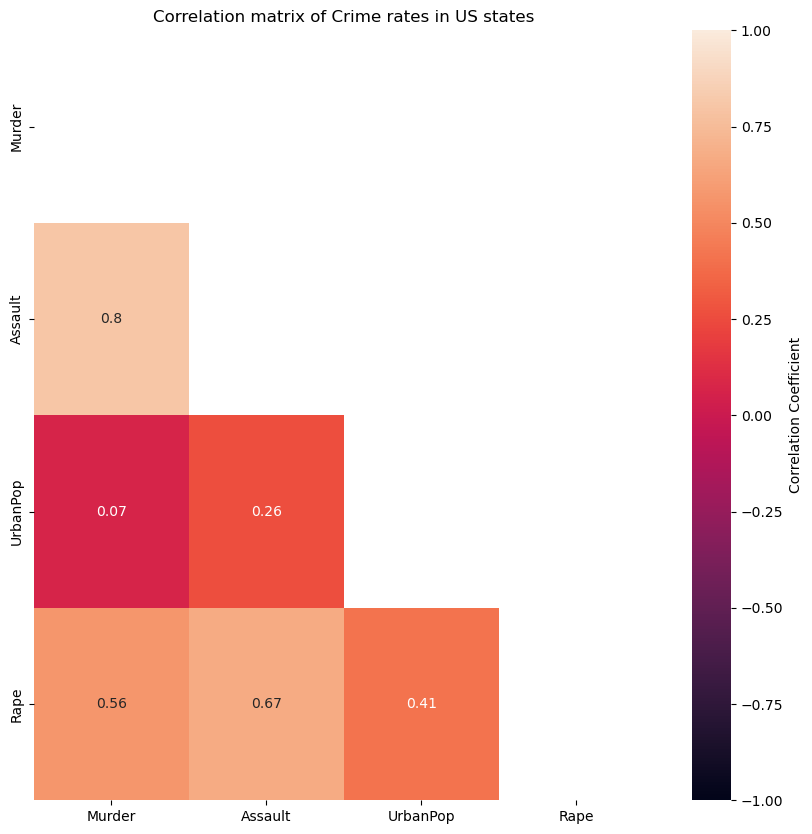

In [188]:
#Plot a mask to make things a bit clearer.
mask = np.triu(np.ones_like(data_df.corr(), dtype = bool))

plt.figure(figsize = (10,10))
sns.heatmap(data_df.corr(), mask = mask, annot = True, vmin = -1, vmax = 1, 
            cbar_kws = {'label': 'Correlation Coefficient'})

plt.title("Correlation matrix of Crime rates in US states")



### Histogram pairs

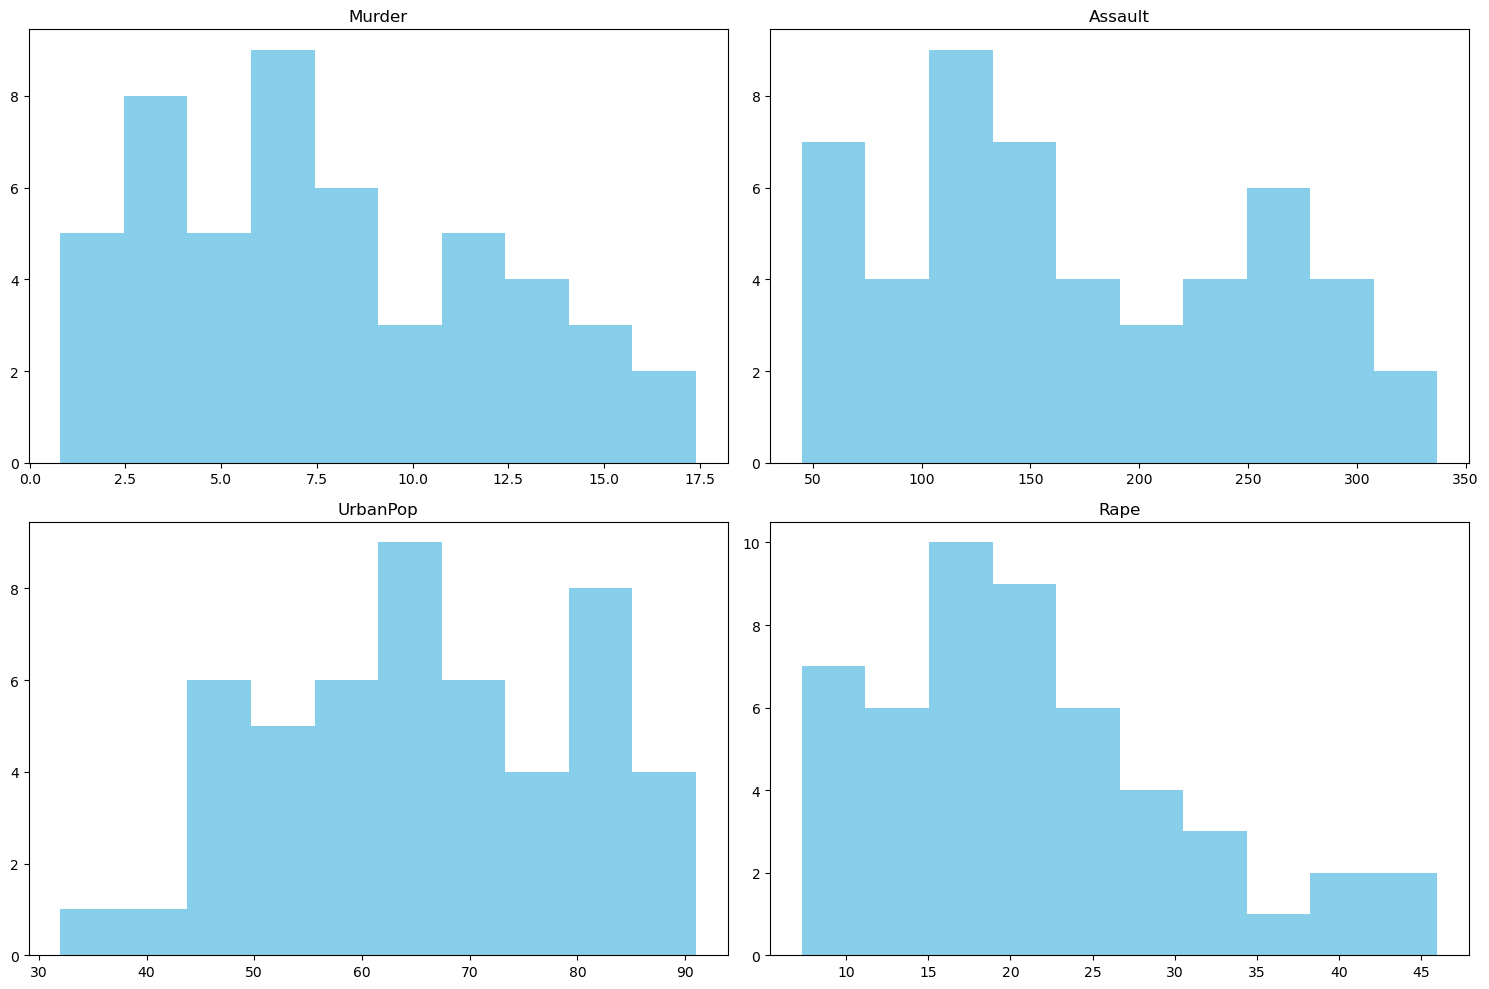

In [189]:
histograms = data_df.hist(color='skyblue', grid=False, figsize=(15, 10)) #This can also be done for each column individually by calling hist on that column
plt.tight_layout()
plt.show()

Analysis:

1. Assault peaks between 100-150
2. for x values below 30 rape and assault have similar shapes. 
3. All violent crime histograms skew towards low values of x.
4. Urban population follows the opposite trend, skewing towards high values of x.

### Scattplot matrix

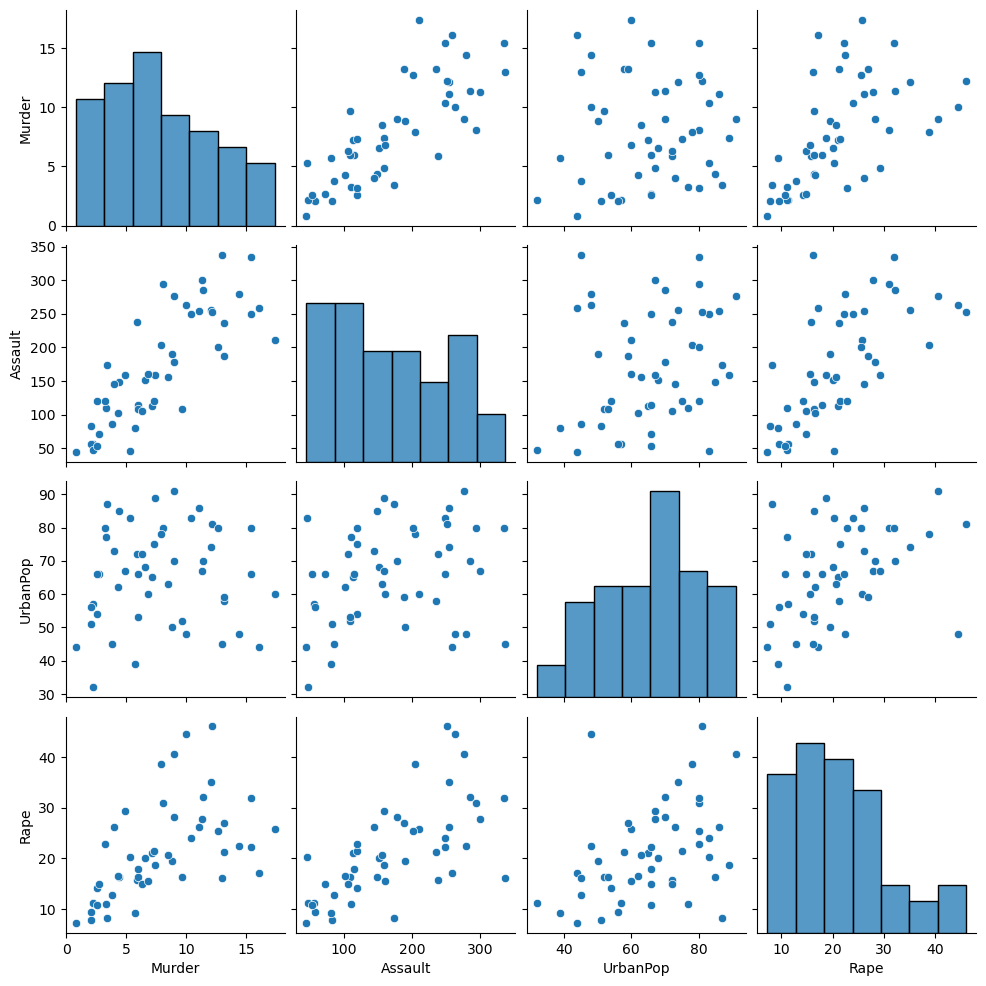

In [190]:
sns.pairplot(data_df)

## PCA

In [227]:
# declare features
data_df = pd.read_csv('./UsArrests.csv')
X = data_df.drop(['City'], axis = 1).values.squeeze()
X

array([[ 13.2, 236. ,  58. ,  21.2],
       [ 10. , 263. ,  48. ,  44.5],
       [  8.1, 294. ,  80. ,  31. ],
       [  8.8, 190. ,  50. ,  19.5],
       [  9. , 276. ,  91. ,  40.6],
       [  7.9, 204. ,  78. ,  38.7],
       [  3.3, 110. ,  77. ,  11.1],
       [  5.9, 238. ,  72. ,  15.8],
       [ 15.4, 335. ,  80. ,  31.9],
       [ 17.4, 211. ,  60. ,  25.8],
       [  5.3,  46. ,  83. ,  20.2],
       [  2.6, 120. ,  54. ,  14.2],
       [ 10.4, 249. ,  83. ,  24. ],
       [  7.2, 113. ,  65. ,  21. ],
       [  2.2,  56. ,  57. ,  11.3],
       [  6. , 115. ,  66. ,  18. ],
       [  9.7, 109. ,  52. ,  16.3],
       [ 15.4, 249. ,  66. ,  22.2],
       [  2.1,  83. ,  51. ,   7.8],
       [ 11.3, 300. ,  67. ,  27.8],
       [  4.4, 149. ,  85. ,  16.3],
       [ 12.1, 255. ,  74. ,  35.1],
       [  2.7,  72. ,  66. ,  14.9],
       [ 16.1, 259. ,  44. ,  17.1],
       [  9. , 178. ,  70. ,  28.2],
       [  6. , 109. ,  53. ,  16.4],
       [  4.3, 102. ,  62. ,  16.5],
 

In [228]:
X.shape

(50, 4)

Principal Components Analysis (PCA) is a method for finding the underlying variables (i.e. principal components) that best differentiate the observations by determining the directions along which your data points are most spread out. Since the determination of the principal components is based on finding the direction that maximises the variance, variables with variance that are much higher than the other variables tend to dominate the analysis purely due to their scale. PCA is a dimensionality reduction techinque which is useful when we have a lot of variables, and need to reduce these. 


PCA or Principal component analysis is a way for the underlying varaibles (known as principal components) to be revealed from within a dataset. Some variables may be important to understand what data we are looking at, but play little role in determining a particular outcome of the data. E.g. the paint color on an airplane is unlikely to play any role in the % of flights that are delayed. But can cause a problem when calculating fuel usage[[ref]](https://simpleflying.com/why-most-aircraft-are-painted-white/).

A PCA will help us to find out which variables need focussing on.

In [229]:
pca = PCA(n_components = 4)

X_trans = pca.fit_transform(X)
X_trans.shape

(50, 4)

In [230]:
#Build dataframe

pca_df = pd.DataFrame(X_trans)
pca_df.head()

,0,1,2,3
0,64.802164,11.448007,-2.494933,2.407901
1,92.827450,17.982943,20.126575,-4.094047
2,124.068216,-8.830403,-1.687448,-4.353685
3,18.340035,16.703911,0.210189,-0.520994
4,107.422953,-22.520070,6.745873,-2.811826


Next I will find some useful information about the dataframe, including proportion variance explained std and cumulative proportion.

In [231]:
std = pca_df.describe().transpose()['std']
variance_explained = pca.explained_variance_ratio_
print(f"Standard Value: {std.values}")
print(f"Proportion variance explained: {variance_explained}")
print(f"Cumulative proportion: {np.cumsum(variance_explained)}")

Standard Value: [83.73 14.21  6.49  2.48]
Proportion variance explained: [9.66e-01 2.78e-02 5.80e-03 8.49e-04]
Cumulative proportion: [0.97 0.99 1.   1.  ]


### Generate a biplot

In [232]:
def biplot(score, coeff, labels = None, points = None):
    xs = score[:, 0]
    ys = score[:, 1]
    n = coeff.shape[0]
    scalex = 1 / (xs.max() - xs.min())
    scaley = 1  / (ys.max() - ys.min())
    
    fig, ax = plt.subplots()
    ax.scatter(xs * scalex, ys * scaley, s = 5)
    
    for i in range(0, len(xs)):
        text = data_df.index[i]
        ax.annotate(text, (xs[i] * scalex, ys[i] * scaley))
        
    for i in range(0, n):
        ax.arrow(0, 0, coeff[i, 0], coeff[i,1], alpha = 0.5, color = 'blue')
        if labels is None:
            ax.text(coeff[i, 0] * 1.15, coeff[i, 1] * 1.15, 'Var' + str(i + 1), ha = 'center', 
                    va = 'center', color = 'blue')
        else:
            ax.text(coeff[i, 0] * 1.15, coeff[i, 1] * 1.15, labels[i], ha = 'center', 
                    va = 'center', color = 'blue')
            
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.grid()

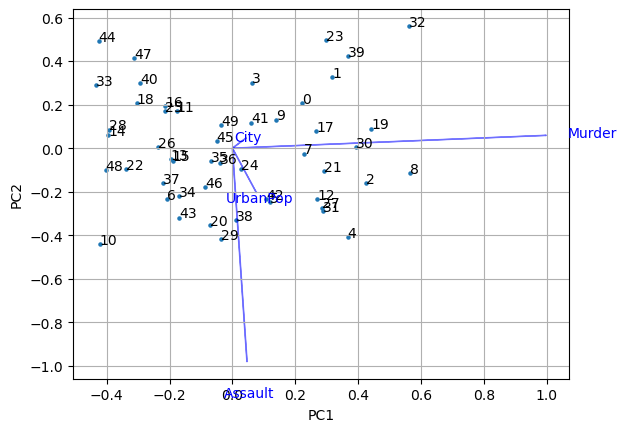

In [233]:
biplot(X_trans[:, 0:2], np.transpose(pca.components_[0:2,:]), list(data_df.columns[:4]), list(data_df.index))

The length of each blue line represents the magnitude of the eigenvalues of each component. From this, one can see that Murder and Assault are the most dominant offences within this particular dataset 


We can see that the observations are fairly evenly distributed along the first and second component. It is possible to discern some possible clustering by region. Southern states seem to load heavily on PC1 while Midwestern state load heavily on PC2 and not on component 1. There are exceptions to these trends and it is not uniform throughout.

The data is rather stacked so this can be hard to understand at first. However, we can see that the dataset as a whole skews positively PC1 and around 0 for PC2, with the range for both PCs being -0.4 to +0.6. 
Normally would be interesting to see how things such as the state's political leaning would affect data, but since this data is from 1973, and the 1972 presidential election was won with almost every single state voting for Nixon, in this particular dataset it may not be as enlightening. 

### Standardise data


In [234]:
X_standard = StandardScaler().fit_transform(X)
pca_standard = PCA()
X_stand_trans = pca_standard.fit_transform(X_standard)

In [235]:
standard_df = pd.DataFrame(X_stand_trans)
standard_df.head()

,0,1,2,3
0,0.985566,1.133392,-0.444269,0.156267
1,1.950138,1.073213,2.040003,-0.438583
2,1.763164,-0.745957,0.054781,-0.834653
3,-0.141420,1.119797,0.114574,-0.182811
4,2.523980,-1.542934,0.598557,-0.341996


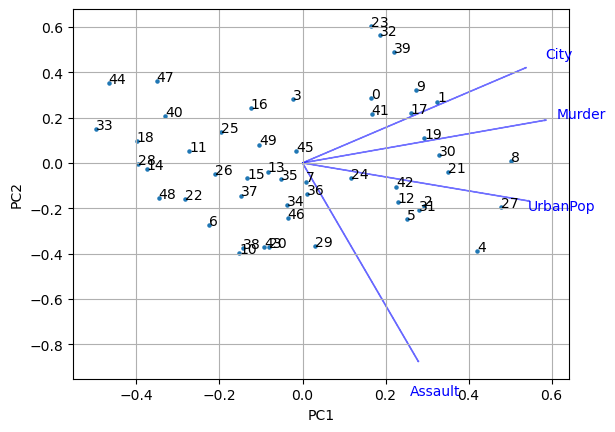

In [236]:
biplot(X_stand_trans[:,0:2], np.transpose(pca_standard.components_[0:2,:]), list(data_df.columns[:4]))

Now with State included, we can see the role that also plays in the distribution of data. Now the data has been standardised, the large values of urbanpop wouldnt dominate the plot unfairly. 

### Cumulative Variance

Text(0, 0.5, 'Explained variance')

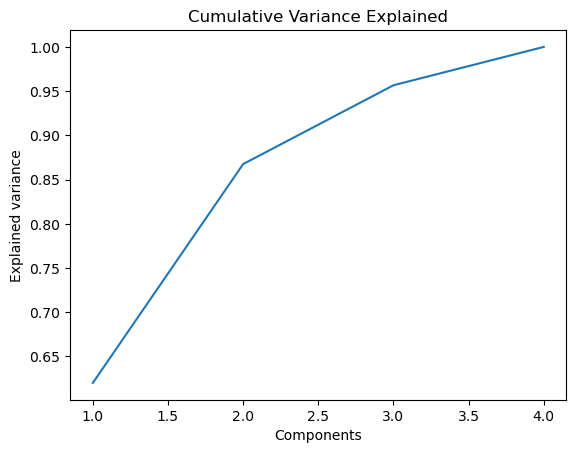

In [237]:
plt.plot(range(1, len(pca_standard.explained_variance_ratio_) + 1), np.cumsum(pca_standard.explained_variance_ratio_))
plt.title("Cumulative Variance Explained")
plt.xlabel("Components")
plt.ylabel("Explained variance")

### Scree Plot

Text(0.5, 1.0, 'Scree plot')

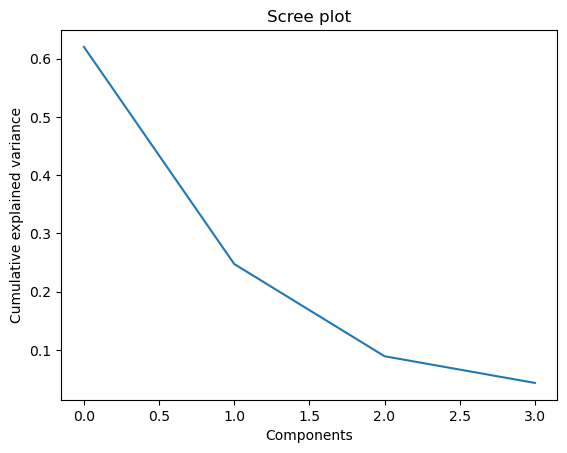

In [238]:
plt.plot(pca_standard.explained_variance_ratio_)
plt.xlabel('Components')
plt.ylabel("Cumulative explained variance")
plt.title("Scree plot")


## Hierarchical Clustering

In [243]:
AggCluster  = AgglomerativeClustering(distance_threshold = 0, n_clusters = None)
AggCluster = AggCluster.fit(pca_df)

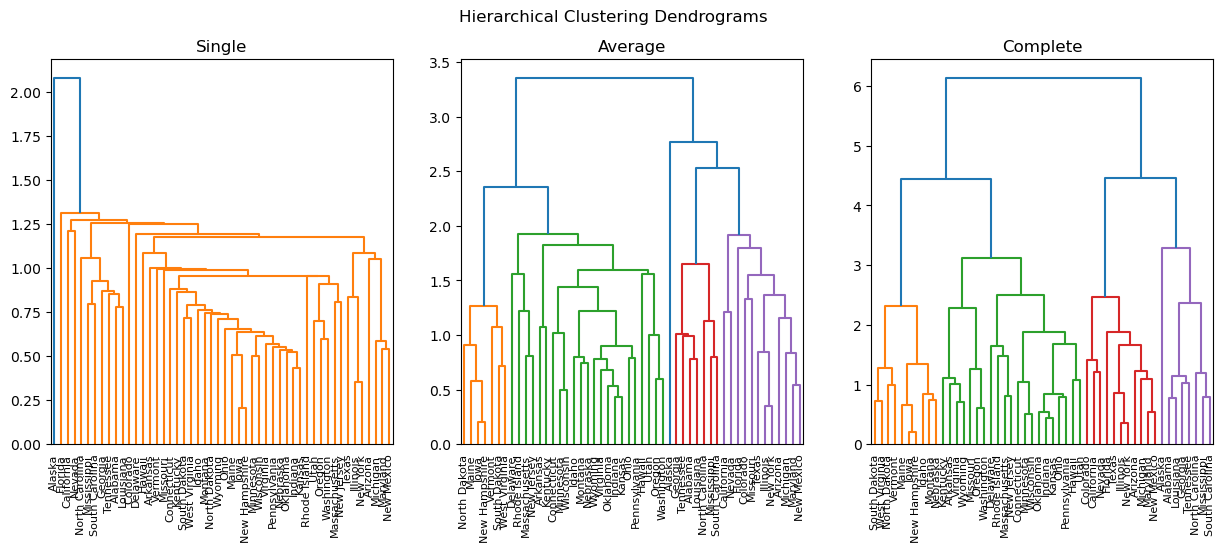

In [244]:
# plotting clustering
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize = (15,5))
fig.suptitle("Hierarchical Clustering Dendrograms")
ax1.set_title("Single")
ax2.set_title("Average")
ax3.set_title("Complete")
dendrogram(linkage(pca_df, method = 'single'), labels = pca_df.index, ax = ax1)
dendrogram(linkage(pca_df, method = 'average'), labels = pca_df.index, ax = ax2)
dendrogram(linkage(pca_df, method = 'complete'), labels =pca_df.index, ax = ax3)
plt.show()

Judging by these three dendrograms, complete linkage has the most even distribution and so I will plot a larger individual plot of this dendrogram below.

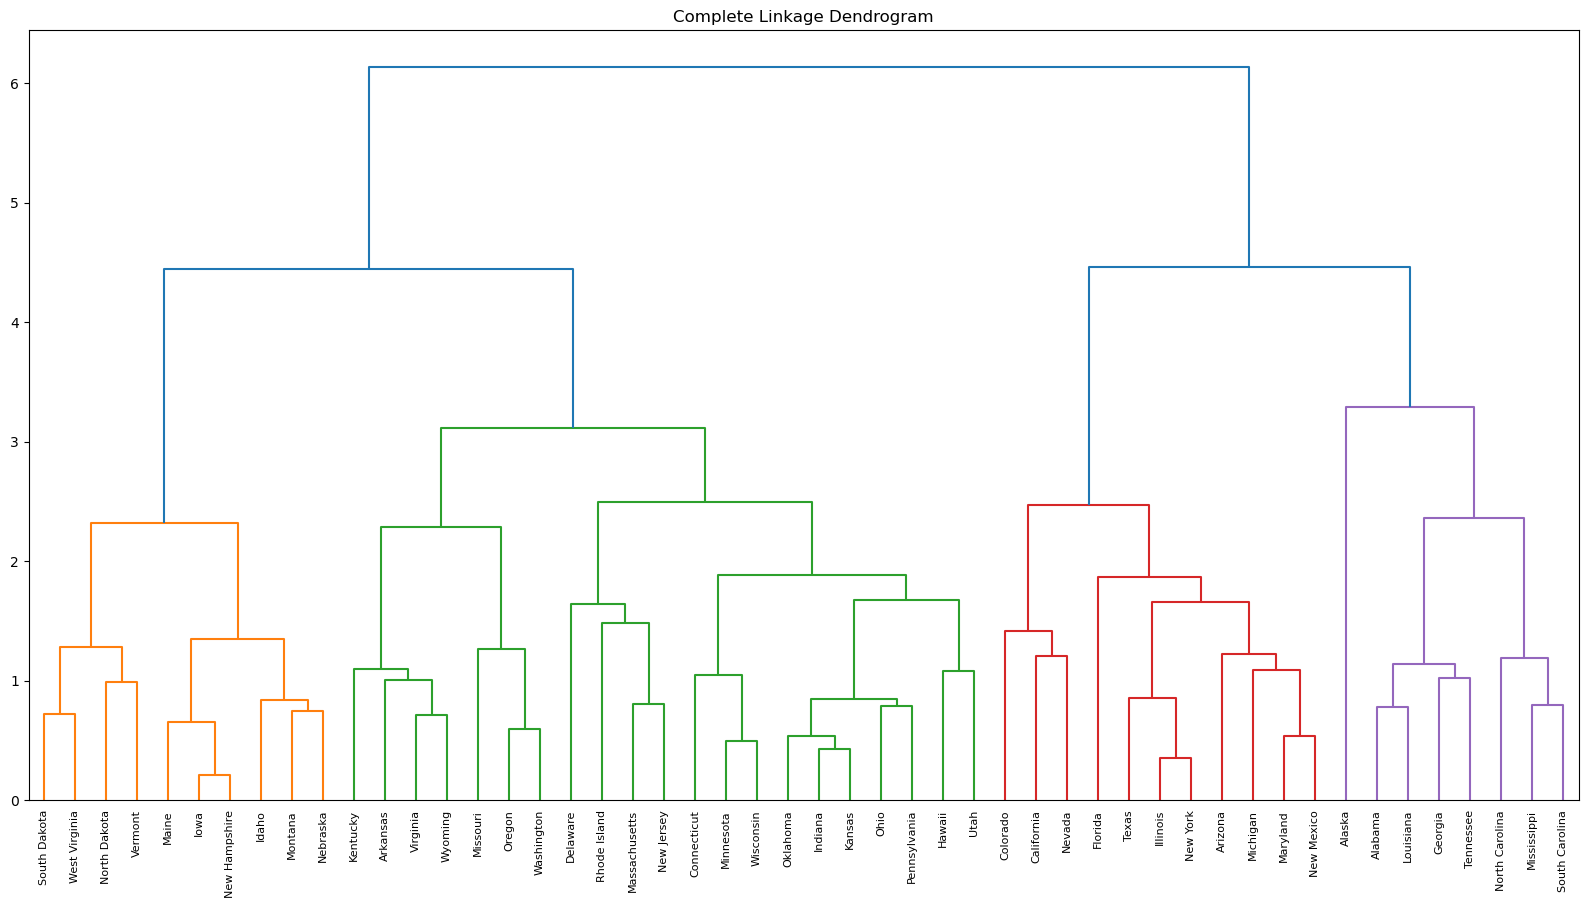

In [245]:
plt.figure(figsize = (20,10))
dendrogram(linkage(pca_df, method = 'complete'), labels = pca_df.index)
plt.title("Complete Linkage Dendrogram")
plt.show()

## K-Means

In [251]:
x = X_stand_trans[:, 0]
y = X_stand_trans[:, 1]

k = 3 

kmeans = KMeans(n_clusters = k, init = 'k-means++', random_state = 42)
cluster_labels = kmeans.fit_predict(pca_df)

In [252]:
cluster_labels

array([1, 1, 1, 2, 1, 1, 0, 0, 1, 1, 0, 2, 1, 0, 2, 0, 2, 1, 2, 1, 0, 1,
       2, 1, 1, 2, 2, 1, 2, 0, 1, 1, 1, 2, 0, 0, 0, 0, 0, 1, 2, 1, 1, 0,
       2, 0, 0, 2, 2, 0])

In [253]:
centers = kmeans.cluster_centers_
centers

array([[-4.72e-01, -7.43e-01, -1.64e-01,  2.07e-02],
       [ 1.66e+00,  3.00e-01,  3.20e-03,  6.03e-04],
       [-1.83e+00,  4.21e-01,  1.83e-01, -2.45e-02]])

Text(0, 0.5, 'Dim 2')

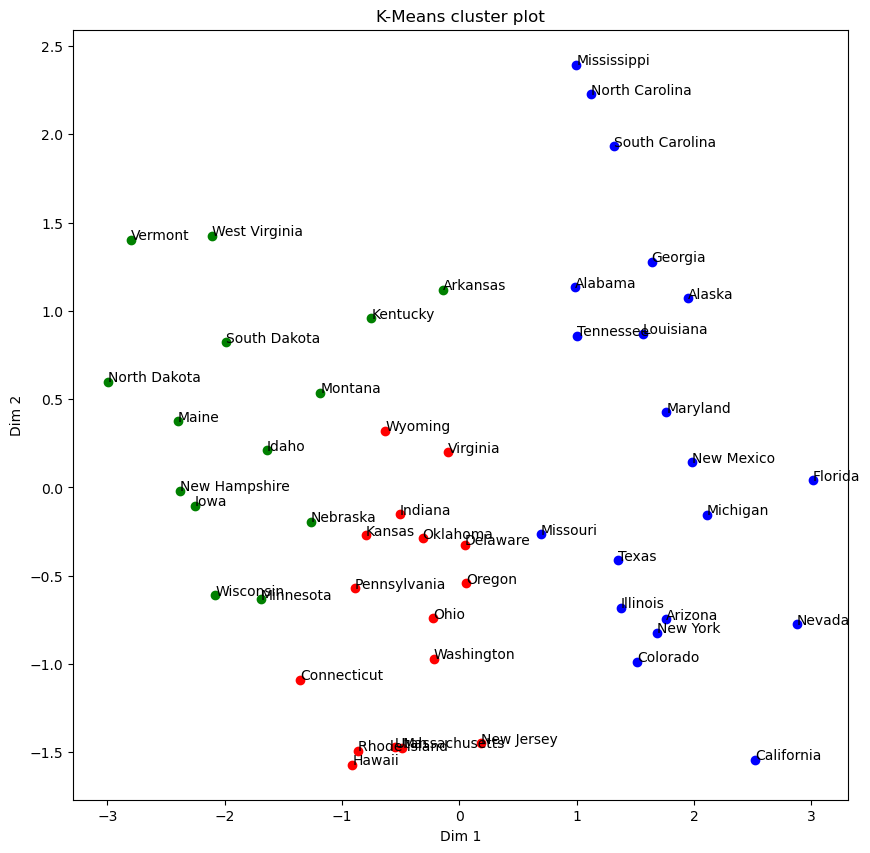

In [257]:
# plot clusters

fig, ax = plt.subplots(figsize = (10, 10))

colors = 'rbgy'

for i in range(0,k):
    ax.scatter(x[cluster_labels == i], y[cluster_labels == i], c=  colors[i])
for i in range(0, len(x)):
    text = data_df.index[i]
    ax.annotate(text, (x[i], y[i]))
ax.set_title("K-Means cluster plot")
ax.set_xlabel("Dim 1")
ax.set_ylabel("Dim 2")
